In [1]:
! ls OneDrive_1_11-11-2022 | cut -d '.' -f2 | uniq -c`      `

   3 avi


In [2]:
import os
import sys

sys.path.append('')
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [3]:
root = os.path.join(os.getcwd(), 'OneDrive_1_11-11-2022')
videos = [x for x in os.listdir(root) if x.endswith('avi')]

In [14]:
xid = 2
print(f'{videos[xid]}')
video = cv2.VideoCapture(os.path.join(root, videos[xid]))
if not video.isOpened():
    os.exit(1)

frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
frames_per_second = int(video.get(cv2.CAP_PROP_FPS))

frames = np.array([video.read()[1] for x in range(frame_count)])
video.release()

ShalA4C181016CROP.avi


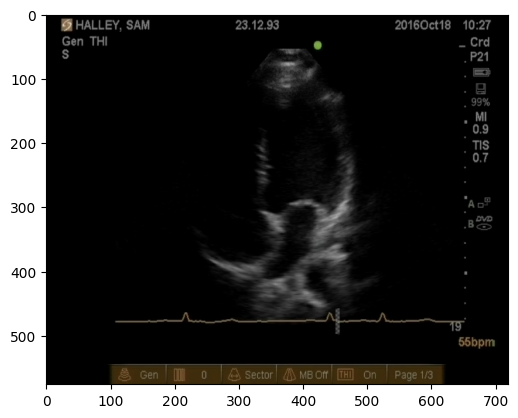

In [15]:
plt.imshow(frames[0])

In [6]:
plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

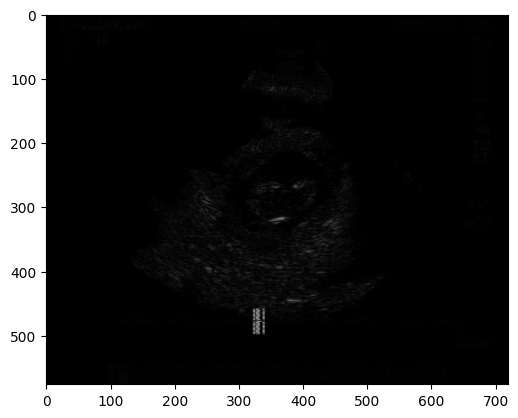

In [9]:
from scipy.ndimage import gaussian_filter
diff = []
for i in range(len(frames) - 1):

    f1 = np.dot(frames[i], [0.299, 0.587, 0.114])
    f2 = np.dot(frames[i + 1], [0.299, 0.587, 0.114])

    diff = np.abs(f1 - f2)
    break

plt.imshow(diff)

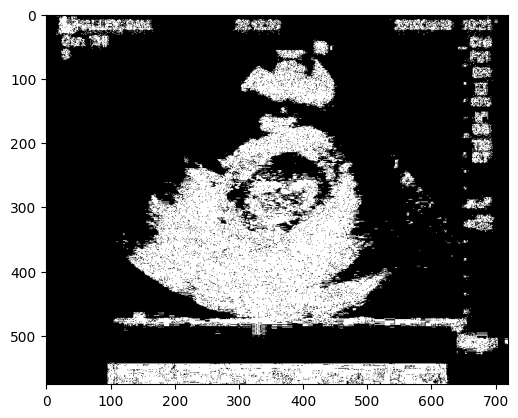

In [8]:
b = np.where(diff > 0, 1, 0)
plt.imshow(b)